# COMP47590: Advanced Machine Learning
# Assignment 2: Lunar Lander

## Vipin Hans - 17201230
## Suddhasattwa Banerjee - 17204403

## Import Packages Etc

In [31]:
import os 
import cv2
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn import preprocessing 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import neighbors

import keras
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten,Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop, adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from keras import backend as K
from sklearn.externals import joblib

K.set_image_data_format('channels_first')

# Task 1: Train using State Vectors

## Preparing the Data
Load the dataset and pre-process it. Divide this into train and test splits. Balance the training split.

In [3]:
# Sample rate for the data
sample_rate = 0.5

# Reading the state data from the csv file
data = pd.read_csv("state_vectors_2018-04-28-13-16-26.csv")

# Sampling hte data based on the sampling rate
data=data.sample(frac=sample_rate)

# Extracting the features
X = data.iloc[:,1:9]

# Extracting the labels
Y = data.iloc[:,9]

cols = X.columns

# Perfrom split to train, validation, test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.30, train_size = 0.7)

## Creating different classifiers

In [4]:
model = MLPClassifier(batch_size=50,learning_rate='invscaling',verbose =True)
model.fit(x_train,y_train)

Iteration 1, loss = 0.83280390
Iteration 2, loss = 0.67021313
Iteration 3, loss = 0.61699585
Iteration 4, loss = 0.58023615
Iteration 5, loss = 0.55183772
Iteration 6, loss = 0.52891056
Iteration 7, loss = 0.50884334
Iteration 8, loss = 0.49156073
Iteration 9, loss = 0.47638903
Iteration 10, loss = 0.46256423
Iteration 11, loss = 0.45079441
Iteration 12, loss = 0.43898737
Iteration 13, loss = 0.42850255
Iteration 14, loss = 0.41926143
Iteration 15, loss = 0.41083936
Iteration 16, loss = 0.40187774
Iteration 17, loss = 0.39350212
Iteration 18, loss = 0.38535352
Iteration 19, loss = 0.37793715
Iteration 20, loss = 0.36991495
Iteration 21, loss = 0.36279605
Iteration 22, loss = 0.35559218
Iteration 23, loss = 0.34945801
Iteration 24, loss = 0.34279798
Iteration 25, loss = 0.33686682
Iteration 26, loss = 0.33204345
Iteration 27, loss = 0.32552030
Iteration 28, loss = 0.32063982
Iteration 29, loss = 0.31564196
Iteration 30, loss = 0.31021641
Iteration 31, loss = 0.30596811
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [29]:
model1 = tree.DecisionTreeClassifier(criterion="entropy")
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
model2 = neighbors.KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predicting and Evaluating

Making predictions using the test data and calculating the accuracy.

In [5]:
# Making predictions using the test data
pred = model.predict(x_test)

# Calculating accuracy for the predictions
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, pred))

Accuracy: 0.95216207014
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2773
          1       0.90      0.60      0.72       213
          2       0.96      0.97      0.97      2704
          3       0.88      0.75      0.81       184

avg / total       0.95      0.95      0.95      5874



In [30]:
# Making predictions using the test data
pred1 = model1.predict(x_test)

# Calculating accuracy for the predictions
accuracy = metrics.accuracy_score(y_test, pred1)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, pred1))

Accuracy: 0.807286346612
             precision    recall  f1-score   support

          0       0.83      0.84      0.84      2773
          1       0.54      0.50      0.52       213
          2       0.82      0.82      0.82      2704
          3       0.45      0.43      0.44       184

avg / total       0.81      0.81      0.81      5874



In [33]:
# Making predictions using the test data
pred2 = model2.predict(x_test)

# Calculating accuracy for the predictions
accuracy = metrics.accuracy_score(y_test, pred2)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, pred2))

Accuracy: 0.787027579162
             precision    recall  f1-score   support

          0       0.85      0.76      0.80      2773
          1       0.79      0.33      0.47       213
          2       0.74      0.88      0.80      2704
          3       0.95      0.30      0.45       184

avg / total       0.80      0.79      0.78      5874



In [6]:
# Exporting the Model
joblib.dump(model, 'player_state.mod') 

['player_state.mod']

# Task 2: Train using Image set

## Preparing the Data
Load the raw image dataset and pre-process it. Divide this into train and test splits. Balance the training split.

### Load Images

Loads a set of images and resizes each image to 64x64 and coverts to black and white. 

In [7]:
# Set up some parmaeters for data loading
TRAIN_DIR = './data/'
sample_rate = 0.1
ROWS = 84
COLS = 84
CHANNELS = 1

# generate filenames from the data folder and do sampling
image_filenames = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if not i.startswith('.')] # use this for full dataset
image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

# Create a data array for image data
count = len(image_filenames)
data = np.ndarray((count,CHANNELS, ROWS, COLS), dtype=np.float)
# Iterate throuigh the filenames and for each one load the image, resize and normalise
for i, image_file in enumerate(image_filenames):
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)    
    data[i] = image
    data[i] = data[i]/255
    if i%1000 == 0: print('Processed {} of {}'.format(i, count))

print("Train shape: {}".format(data.shape))

Processed 0 of 6432
Processed 1000 of 6432
Processed 2000 of 6432
Processed 3000 of 6432
Processed 4000 of 6432
Processed 5000 of 6432
Processed 6000 of 6432
Train shape: (6432, 1, 84, 84)


### Generating the Labels

We're dealing with a multi-class classification problem here - (0) no action, (1) left, (2) up, and (3) right. The lables can be created by looping over the file names in the train directory.

In [8]:
image_filenames

['./data/frame_2018-03-08-10-35-25_110_0.jpeg',
 './data/frame_2018-03-08-00-33-27_193_0.jpeg',
 './data/frame_2018-03-08-00-16-46_155_0.jpeg',
 './data/frame_2018-03-08-00-45-05_68_2.jpeg',
 './data/frame_2018-03-08-00-10-59_2_1.jpeg',
 './data/frame_2018-03-07-22-49-16_110_0.jpeg',
 './data/frame_2018-03-08-12-46-30_143_2.jpeg',
 './data/frame_2018-03-08-00-38-56_111_2.jpeg',
 './data/frame_2018-03-08-12-42-54_89_2.jpeg',
 './data/frame_2018-03-08-09-19-38_190_0.jpeg',
 './data/frame_2018-03-07-23-22-46_101_0.jpeg',
 './data/frame_2018-03-07-23-54-54_96_0.jpeg',
 './data/frame_2018-03-07-22-26-54_132_0.jpeg',
 './data/frame_2018-03-08-10-30-37_63_2.jpeg',
 './data/frame_2018-03-07-22-55-40_200_0.jpeg',
 './data/frame_2018-03-07-23-58-46_171_0.jpeg',
 './data/frame_2018-03-08-10-15-29_116_2.jpeg',
 './data/frame_2018-03-07-23-11-10_187_0.jpeg',
 './data/frame_2018-03-08-00-08-23_146_2.jpeg',
 './data/frame_2018-03-08-12-25-13_226_0.jpeg',
 './data/frame_2018-03-08-10-14-16_106_0.jpeg'

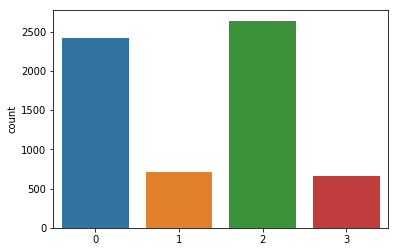

In [9]:
# Extract the lables from the last characters in the filename
labels = []
for i in image_filenames:
    l = i[-6:-5]
    labels.append(int(l))
        
# Count the number of clases
num_classes = len(set(labels))

# convert to binary encoded labels
labels_wide = keras.utils.to_categorical(labels, num_classes)

# Plot a bar plot of the 
sns.countplot(labels)

### Show some screens
Print a few screens with their labels.

2


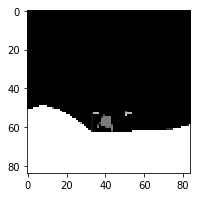

0


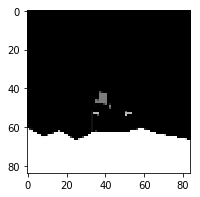

0


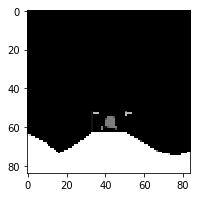

3


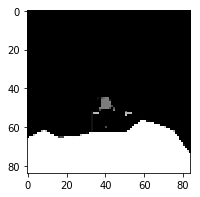

0


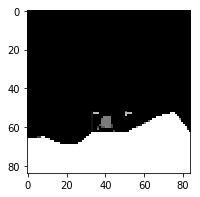

In [10]:
for i in range(0,5):
    idx = random.randint(0, len(labels))
    print(labels[idx])
    plt.figure(figsize=(3,3))
    plt.imshow(data[idx][0], cmap='gray')
    plt.show()

### Partition the dataset for evaluation
Split the data into a training and test partition so we can evaluate at the end

In [11]:
train, test, train_labels, test_labels = train_test_split(data, labels, random_state=0, test_size = 0.2, train_size = 0.8)
train_labels_wide = keras.utils.to_categorical(train_labels, num_classes)
test_labels_wide = keras.utils.to_categorical(test_labels, num_classes)

Apply under sampling to balance the training dataset

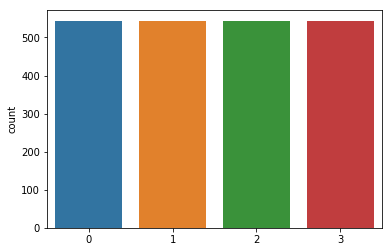

In [12]:
# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
train_rus, train_labels_rus, idx_resampled = rus.fit_sample(train.reshape(len(train), ROWS*COLS*CHANNELS), train_labels)
train_rus, train_labels_rus = shuffle(train_rus, train_labels_rus)
train_rus = train_rus.reshape(len(train_rus),CHANNELS,ROWS, COLS)
sns.countplot(train_labels_rus)
train_labels_rus_wide = keras.utils.to_categorical(train_labels_rus, num_classes)

## LunarLanderNet

A simple convolutional network to control the lander.

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 84, 84)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 42, 42)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7225472   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 7,226,308
Trainable params: 7,226,308
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

In [15]:
epochs = 50
batch_size = 128

history = model.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 1632 samples, validate on 544 samples
Epoch 1/50
1632/1632 [==============================] - 71s 44ms/step - loss: 1.7321 - acc: 0.2788 - val_loss: 1.3709 - val_acc: 0.3051
Epoch 2/50
1632/1632 [==============================] - 72s 44ms/step - loss: 1.3719 - acc: 0.2947 - val_loss: 1.3653 - val_acc: 0.3309
Epoch 3/50
1632/1632 [==============================] - 69s 43ms/step - loss: 1.3491 - acc: 0.3254 - val_loss: 1.3490 - val_acc: 0.3529
Epoch 4/50
1632/1632 [==============================] - 61s 37ms/step - loss: 1.3203 - acc: 0.3646 - val_loss: 1.3289 - val_acc: 0.4044
Epoch 5/50
1632/1632 [==============================] - 65s 40ms/step - loss: 1.3006 - acc: 0.3597 - val_loss: 1.3136 - val_acc: 0.3732
Epoch 6/50
1632/1632 [==============================] - 62s 38ms/step - loss: 1.2619 - acc: 0.3964 - val_loss: 1.2878 - val_acc: 0.4265
Epoch 7/50
1632/1632 [==============================] - 62s 38ms/step - loss: 1.2282 - acc: 0.4099 - val_loss: 1.2682 - val_acc: 0.4412
E

Plot the evolution of the loss as the module was trained.

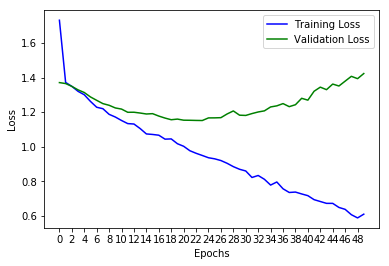

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evaluate the Model
Use the test dataset to evaluate the model

In [17]:
print("****** Test Data ********")
print(test.shape)
print(train.shape)
# Make a set of predictions for the validation data
pred = model.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
(1287, 1, 84, 84)
(5145, 1, 84, 84)
             precision    recall  f1-score   support

          0       0.43      0.30      0.36       494
          1       0.35      0.62      0.45       137
          2       0.48      0.41      0.44       537
          3       0.34      0.69      0.46       119

avg / total       0.44      0.42      0.41      1287

Confusion Matrix
[[149  74 199  72]
 [ 25  85  22   5]
 [157  80 221  79]
 [ 14   5  18  82]]


### Persist A Model
Save the model

In [18]:
filepath = "player_images_2.mod"
model.save(filepath)

### Task 3

## Importing modules

In [20]:
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

import io
import sys
import csv

### Get the environment and extract the number of actions.

In [21]:

ENV_NAME = 'LunarLander-v2'
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### Next, we build a very simple model.

In [24]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

In [27]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=300000, window_length=1)
policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)
# After training is done, we save the final weights.
dqn.load_weights('dqn_{}_weights.h5f'.format(ENV_NAME))

# Redirect stdout to capture test results
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()

# Evaluate our algorithm for a few episodes.
dqn.test(env, nb_episodes=200, visualize=False)

# Reset stdout
sys.stdout = old_stdout

results_text = mystdout.getvalue()

# Print results text
print("results")
print(results_text)

# Extact a rewards list from the results
total_rewards = list()
for idx, line in enumerate(results_text.split('\n')):
    if idx > 0 and len(line) > 1:
        reward = float(line.split(':')[2].split(',')[0].strip())
        total_rewards.append(reward)

# Print rewards and average	
print("total rewards", total_rewards)
print("average total reward", np.mean(total_rewards))

# Write total rewards to file
f = open("lunarlander_rl_rewards.csv",'w')
wr = csv.writer(f)
for r in total_rewards:
     wr.writerow([r,])
f.close()

Training for 50000 steps ...


/Users/burhanuddinshakir/anaconda3/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


  1000/50000: episode: 1, duration: 10.961s, episode steps: 1000, steps per second: 91, episode reward: -125.966, mean reward: -0.126 [-4.781, 4.279], mean action: 1.927 [0.000, 3.000], mean observation: 0.114 [-0.507, 0.925], loss: 0.627266, mean_absolute_error: 2.776913, mean_q: 4.180063
  2000/50000: episode: 2, duration: 10.350s, episode steps: 1000, steps per second: 97, episode reward: -160.383, mean reward: -0.160 [-4.108, 3.957], mean action: 1.847 [0.000, 3.000], mean observation: 0.116 [-0.196, 0.935], loss: 0.482160, mean_absolute_error: 1.999463, mean_q: 3.053334
  3000/50000: episode: 3, duration: 9.954s, episode steps: 1000, steps per second: 100, episode reward: -97.894, mean reward: -0.098 [-4.224, 5.370], mean action: 1.595 [0.000, 3.000], mean observation: 0.133 [-0.779, 1.130], loss: 0.605356, mean_absolute_error: 1.702875, mean_q: 2.293379
  4000/50000: episode: 4, duration: 9.167s, episode steps: 1000, steps per second: 109, episode reward: -120.857, mean reward: -

## Task 4

The data models evaluated in this task are:

1. Image based 
2. State Based MLP
3. Reinforcement Learning

### Reading results from the tasks

In [56]:
# Reading results from Image Based
results1=pd.read_csv('lunarlander_ml_images_rewards.csv')
results1.columns = ["Image Based"]
results1.head()

,Image Based
0,-244.822107
1,-524.755463
2,-161.854110
3,-208.909906
4,-263.917381


In [54]:
# Reading results from State Based
results2=pd.read_csv('lunarlander_ml_states_rewards.csv')
results2.columns = ["State Based"]
results2.head()

,State Based
0,219.660317
1,248.697151
2,236.829201
3,246.248600
4,245.052952


In [55]:
# Reading results from Reinforcement Learning
results3=pd.read_csv('lunarlander_rl_rewards.csv')
results3.columns = ["Reinforcement Learning"]
results3.head()

,Reinforcement Learning
0,-152.948
1,-218.950
2,-197.265
3,-212.174
4,-160.664


In [60]:
#Combining results of all three
results = pd.concat([results1,results2,results3], axis=1)
results.head()

,Image Based,State Based,Reinforcement Learning
0,-244.822107,219.660317,-152.948
1,-524.755463,248.697151,-218.950
2,-161.854110,236.829201,-197.265
3,-208.909906,246.248600,-212.174
4,-263.917381,245.052952,-160.664


In [61]:
pd.DataFrame({"Mean Score":results.mean()})

,Mean Score
Image Based,-335.675674
State Based,227.788645
Reinforcement Learning,-189.289307


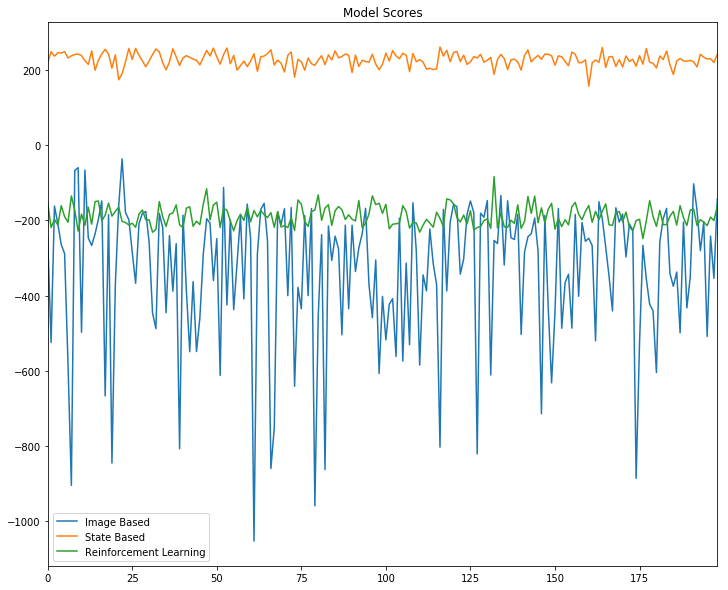

In [69]:
result_plot = result_p =results.plot()
result_plot.title.set_text("Model Scores")
result_plot.figure.set_size_inches(12,10)

## Report

It can be seen that out of many approches the state based approch gives maximum accuracy and efficiency. This approch gives all positive values when compared to Reinforcement learning and Image based model. The Reinforcement learning, however, outperformed Image based model which proved to be poorest performer among all. Furthermore, Image based model shows most of its value as negative during its performance.

Reinforcement learning and state based approach uses similar approch to work on problems using states, the state based approch performed better in this case. Since, reinforcement approch learns from its experience it needs more data, executions and computations to perform better. The image based model is experienced from data which are images genereted by an expert player playing the game. The compressed and low quality non-colored pictures could be the reason this approch couldn't deliver positive results. 

More powerful model and structures can be utilized to compute at higher speeds with better quality data that could improve the efficiency of Image based model. But for now state-based model clearly seems to be the winner.
